In [1]:
!pip install opencv-python

In [2]:
n=input("please enter number.\n")
while(1):
    if(n.isdigit()==True):
        if((int(n)>0 and int(n)<=20)):
            break
            
    print("ERROR,please enter number between 1~20.")
    n=input("please enter number.\n")


print("Number:",int(n))

please enter number.
5
Number: 5


(181, 249, 3)


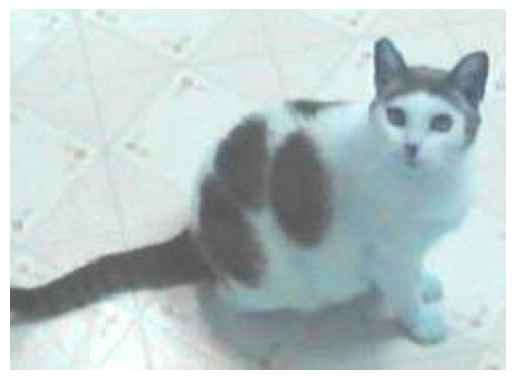

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
path="HW1 image/test/"
img = cv2.imread(path+"pic"+str(n)+".jpg")
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)# BGR -> RGB
plt.imshow(img) 
plt.axis('off')
print (img.shape)

(64, 64, 3)


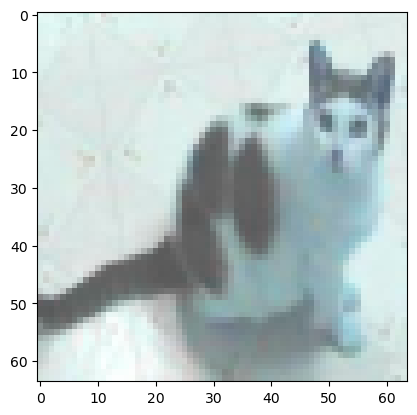

In [4]:
new_img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)
print (new_img.shape)
plt.imshow(new_img)

In [5]:
import pandas as pd
reference_path="HW1 image/reference/"
df = pd.DataFrame(columns=["Name", "value", "label"])
H=64
G=64
for m in range(1,51):
    #resize
    c_img = cv2.imread(reference_path+"cats/cat."+str(m)+".jpg")
    d_img = cv2.imread(reference_path+"dogs/dog."+str(m)+".jpg")
    c_img=cv2.resize(c_img, (64, 64), interpolation=cv2.INTER_AREA)
    d_img=cv2.resize(d_img, (64, 64), interpolation=cv2.INTER_AREA)
    
    c_value =0
    d_value =0
    for c in range(2):
        for i in range(H):
            for j in range(G):
                c_value+=(abs(int(c_img[i][j][c])-int(new_img[i][j][c]))/(64*64*3))
                d_value+=(abs(int(d_img[i][j][c])-int(new_img[i][j][c]))/(64*64*3))
    ctmp={'Name':"cat."+str(m),'value':c_value,'label':'cat'}
    dtmp={'Name':"dog."+str(m),'value':d_value,'label':'dog'}
#     print(ctmp)
#     print(dtmp)
    df = df.append(ctmp, ignore_index=True)
    df = df.append(dtmp, ignore_index=True)


df

C:\Users\gg750\AppData\Local\Temp\ipykernel_14364\4065878443.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ctmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_14364\4065878443.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dtmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_14364\4065878443.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ctmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_14364\4065878443.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dtmp, ignore_index=True)
C:\Users\gg750\AppData\Local

C:\Users\gg750\AppData\Local\Temp\ipykernel_14364\4065878443.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ctmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_14364\4065878443.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dtmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_14364\4065878443.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(ctmp, ignore_index=True)
C:\Users\gg750\AppData\Local\Temp\ipykernel_14364\4065878443.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dtmp, ignore_index=True)
C:\Users\gg750\AppData\Local

,Name,value,label
0,cat.1,81.202393,cat
1,dog.1,62.194743,dog
2,cat.2,54.463298,cat
3,dog.2,44.349202,dog
4,cat.3,42.568522,cat
...,...,...,...
95,dog.48,53.353190,dog
96,cat.49,50.579020,cat
97,dog.49,70.342692,dog
98,cat.50,58.844727,cat


In [6]:
df=df.sort_values(by=['value'],ascending=True)
df=df.reset_index(drop=True)
df

,Name,value,label
0,dog.23,27.806396,dog
1,dog.26,35.541341,dog
2,cat.32,35.952067,cat
3,cat.36,38.473470,cat
4,dog.20,39.251465,dog
...,...,...,...
95,dog.18,85.541504,dog
96,dog.46,85.759847,dog
97,cat.37,86.326742,cat
98,cat.46,89.211833,cat


dog.23 : 27.806396484375004


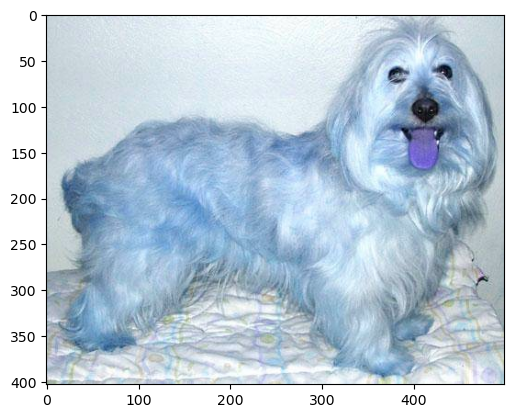

dog.26 : 35.54134114583318


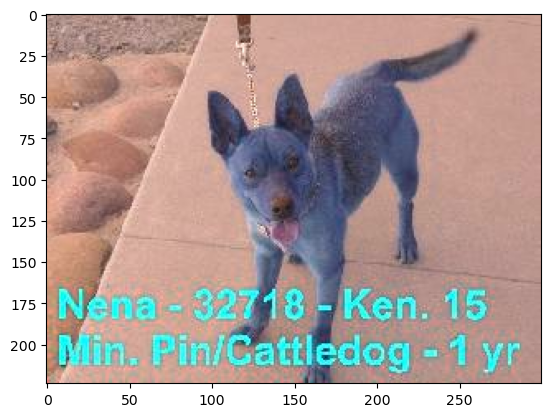

cat.32 : 35.952067057291615


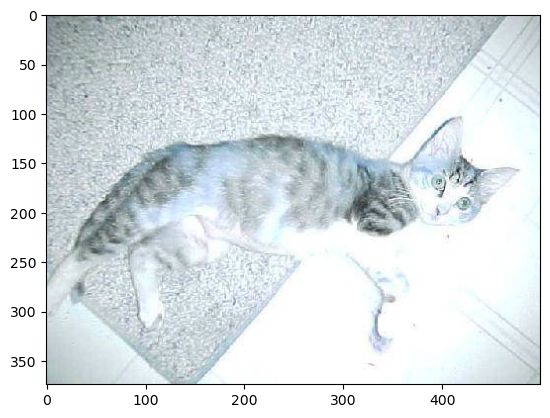


Result: cat:1, dog:2
Image is more like dog.


In [7]:
k=3
dog=0
cat=0
for t in range(k):
    if(df['label'][t]=='cat'):
        print(df['Name'][t],":",df['value'][t])
        cat+=1
    else: #df2['label'][t]=='cat'
        print(df['Name'][t],":",df['value'][t])
        dog+=1
    t_img = cv2.imread(reference_path+str(df['label'][t])+"s/"+str(df['Name'][t])+".jpg")
    plt.imshow(t_img)
    plt.show()

print("\nResult: cat:{}, dog:{}".format(cat,dog))

if(cat>dog):
    print("Image is more like cat.")
else: #(dog>cat)
    print("Image is more like dog.")

In [8]:

for k in range(1,50,2):
    dog=0
    cat=0
    for t in range(k):
        if(df['label'][t]=='cat'):
#             print(df['Name'][t],":",df['value'][t])
            cat+=1
        else: #df2['label'][t]=='cat'
#             print(df['Name'][t],":",df['value'][t])
            dog+=1
        t_img = cv2.imread(reference_path+str(df['label'][t])+"s/"+str(df['Name'][t])+".jpg")
#         plt.imshow(t_img)
#         plt.show()

    print("\nResult K:{}, cat:{}, dog:{}".format(k,cat,dog))

    if(cat>dog):
        print("Image is more like cat.")
    else: #(dog>cat)
        print("Image is more like dog.")
    print("\n.")


Result K:1, cat:0, dog:1
Image is more like dog.

.

Result K:3, cat:1, dog:2
Image is more like dog.

.

Result K:5, cat:2, dog:3
Image is more like dog.

.

Result K:7, cat:4, dog:3
Image is more like cat.

.

Result K:9, cat:5, dog:4
Image is more like cat.

.

Result K:11, cat:6, dog:5
Image is more like cat.

.

Result K:13, cat:7, dog:6
Image is more like cat.

.

Result K:15, cat:7, dog:8
Image is more like dog.

.

Result K:17, cat:9, dog:8
Image is more like cat.

.

Result K:19, cat:11, dog:8
Image is more like cat.

.

Result K:21, cat:12, dog:9
Image is more like cat.

.

Result K:23, cat:13, dog:10
Image is more like cat.

.

Result K:25, cat:14, dog:11
Image is more like cat.

.

Result K:27, cat:14, dog:13
Image is more like cat.

.

Result K:29, cat:15, dog:14
Image is more like cat.

.

Result K:31, cat:16, dog:15
Image is more like cat.

.

Result K:33, cat:17, dog:16
Image is more like cat.

.

Result K:35, cat:18, dog:17
Image is more like cat.

.

Result K:37, cat

## **嘗試不同 k 值對於判斷是貓狗的準確度的影響討論:**

## **測試多個k值後，k=1時相對準確，但也不能採用。<br>因為資料集中，包含測試資料，當 k 為 1 時誤差為 0，<br>但當 k 為其它數值時，則是完全隨機的，誤差更多，<br>後續改善可能要更改算法或是再增加樣本數。**

## **也請於 jupyter notebook 上面討論，此一判斷所選擇之圖片是貓還是狗的方式可能的問題:**

## 若只用像素做比較，可能受到背景或其他物件所影響，顏色不能代表物體的種類，例如一個白色狗和白色的貓，在此種分類中可能會被當成同一種類，而白色貓和黑色的貓，可能會被當成不同種類。 